# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import  plot_confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df2=df.copy()

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
for col in df.columns:
    print(f'Column :{col}')
    print(df[col].value_counts())
    print('___________-')

Column :gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
___________-
Column :age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
___________-
Column :hypertension
0    4612
1     498
Name: hypertension, dtype: int64
___________-
Column :heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
___________-
Column :ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
___________-
Column :work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
___________-
Column :Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
___________-
Column :avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1


**Missing Values in Bmi**

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data Visulization

**Categorical Features**

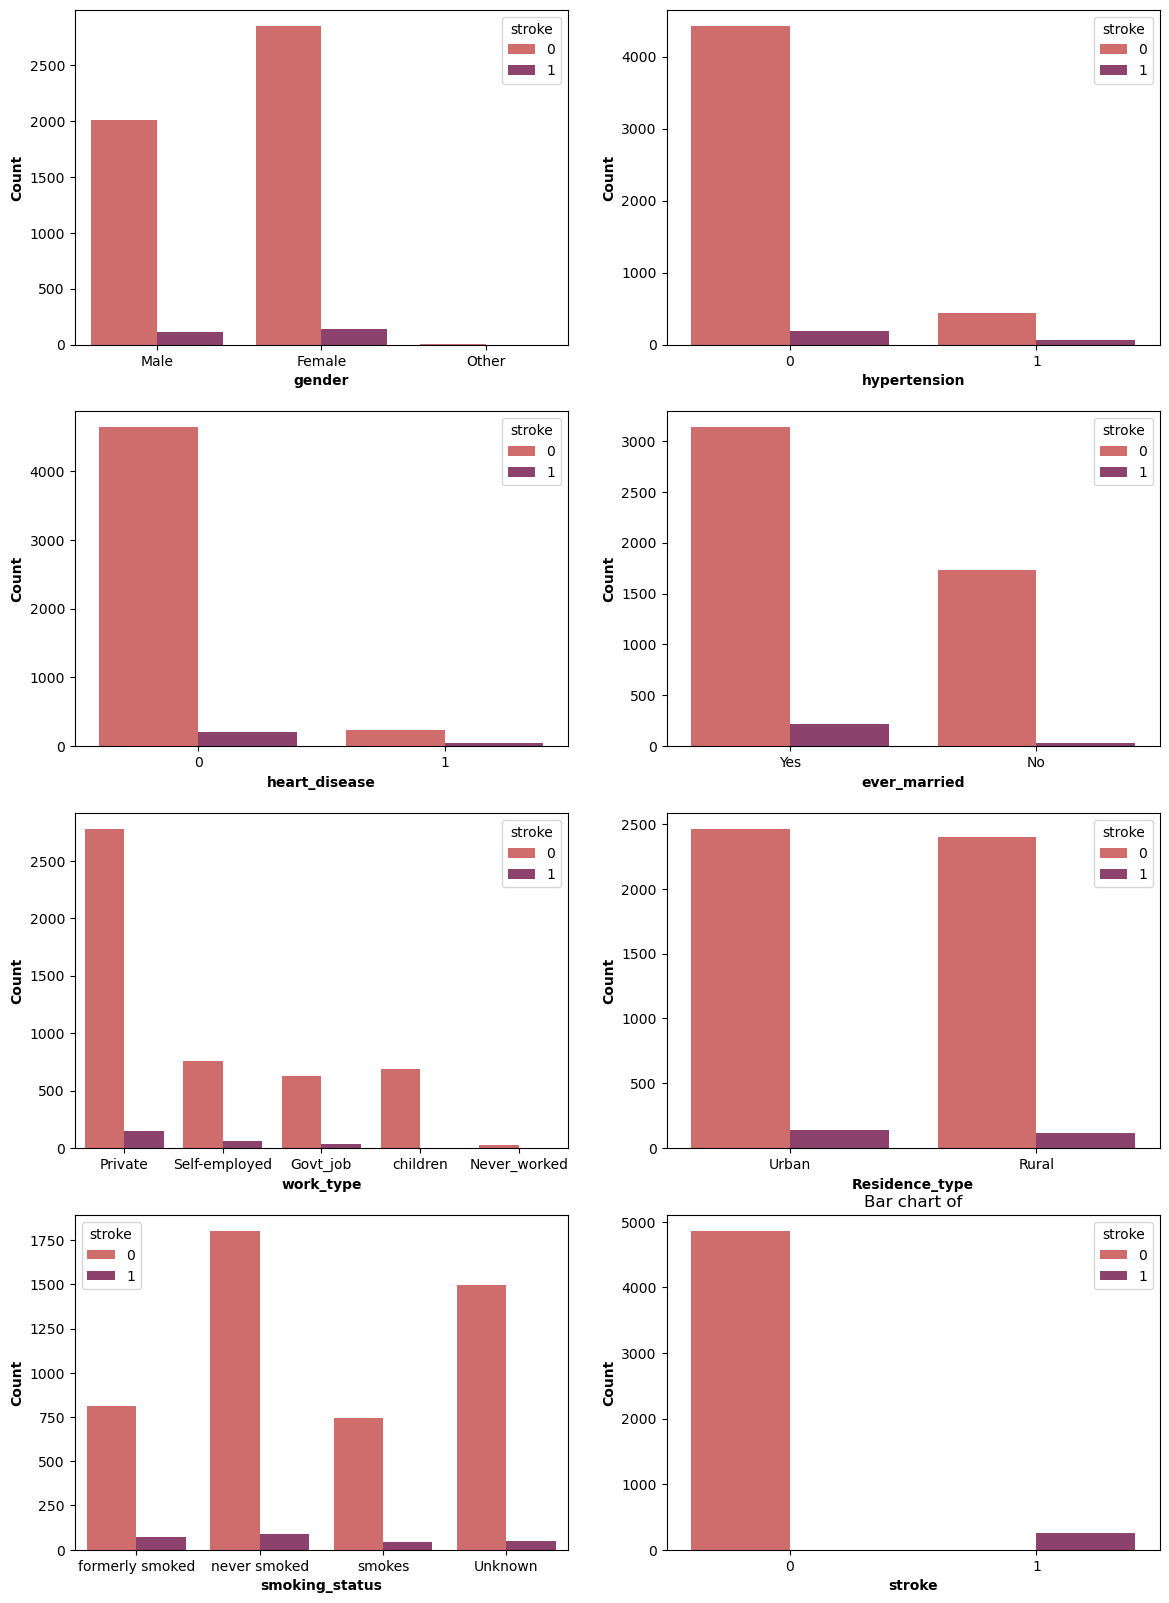

In [9]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

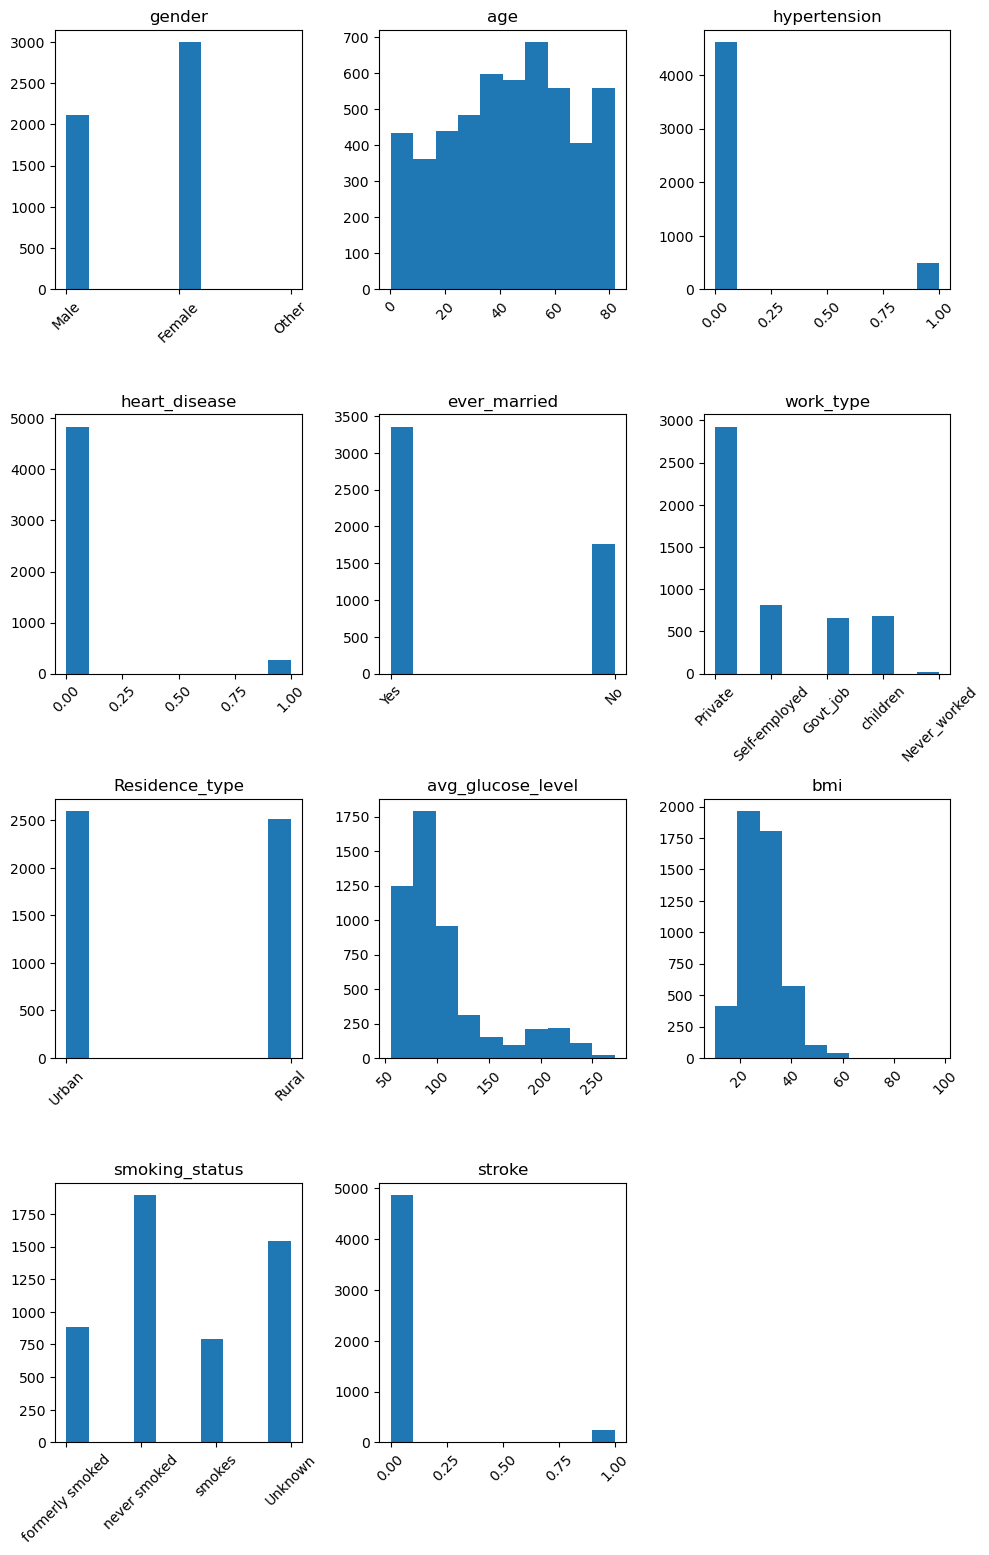

In [10]:
cols=list(df.columns)
plt.figure(figsize=(10,30))
for i in range(len(cols)):
    plt.subplot(8,3,i+1)
    plt.title(cols[i])
    plt.xticks(rotation=45)
    plt.hist(df[cols[i]])
    
plt.tight_layout()

**Stroke (imbalance)**

array([<AxesSubplot:ylabel='stroke'>], dtype=object)

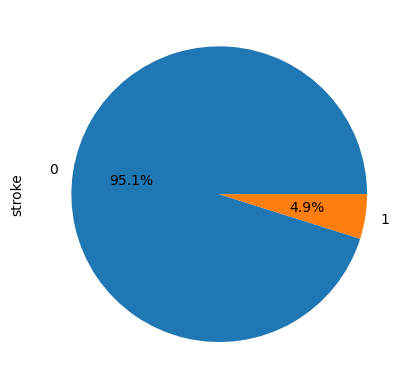

In [11]:
c=round(df['stroke'].value_counts()/df.shape[0]*100,2)
c.plot.pie(autopct='%1.1f%%',subplots=True)

**Residence_type**

array([<AxesSubplot:ylabel='Residence_type'>], dtype=object)

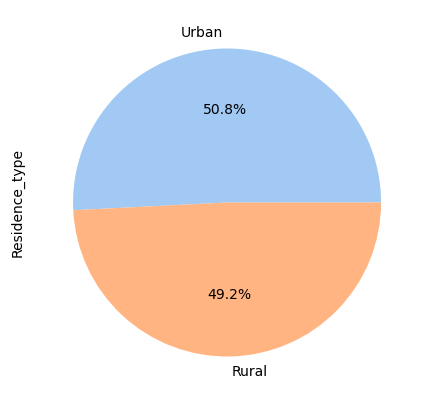

In [12]:
plt.figure(figsize=(5,5))
c=round(df['Residence_type'].value_counts()/df.shape[0]*100,2)
colors = sns.color_palette('pastel')[0:6]
c.plot.pie(autopct='%1.1f%%',subplots=True,colors=colors)

**Work_type**

<AxesSubplot:xlabel='work_type', ylabel='count'>

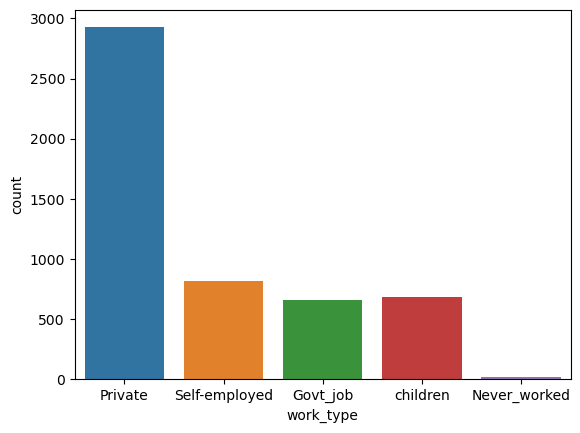

In [13]:
sns.countplot(x='work_type',data=df)

**Correlation**

<AxesSubplot:>

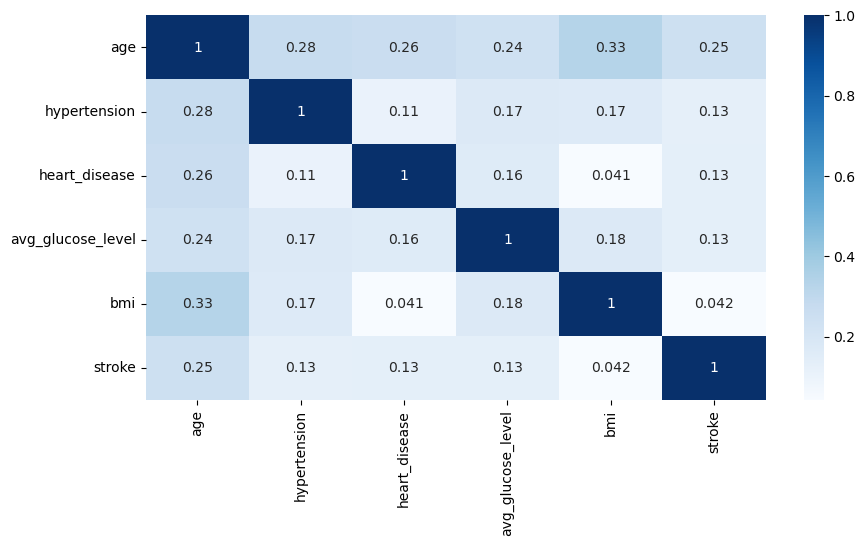

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

# Data Preprocessing

In [15]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**Drop (other) in gender column**

In [16]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [17]:
df.drop(index=3116,inplace=True)

**Missing values in bmi**

In [18]:
df['bmi'].isnull().sum()

201

In [19]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [20]:
df['bmi'].isnull().sum()

0

**categorical Features**

In [21]:
work_type={i:j for (i,j) in zip(df['work_type'].unique(),range(len(df['work_type'].unique())))}
married={'Yes':1,'No':0}
residence={'Urban':0,'Rural':1}
smoking={i:j for (i,j) in zip(df['smoking_status'].unique(),range(len(df['smoking_status'].unique())))}
gender={'Male':0,'Female':0}

In [22]:
df['work_type']=df['work_type'].map(work_type)
df['ever_married']=df['ever_married'].map(married)
df['Residence_type']=df['Residence_type'].map(residence)
df['smoking_status']=df['smoking_status'].map(smoking)
df['gender']=df['gender'].map(gender)

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.6,0,1
1,0,61.0,0,0,1,1,1,202.21,28.1,1,1
2,0,80.0,0,1,1,0,1,105.92,32.5,1,1
3,0,49.0,0,0,1,0,0,171.23,34.4,2,1
4,0,79.0,1,0,1,1,1,174.12,24.0,1,1


# Machine Learning

**Split the dataset**

In [24]:
x=df.drop('stroke',axis=1)
y=df['stroke']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Imbalace Data

In [26]:
train_data=pd.concat([x_train,y_train],axis=1)
no_stroke=train_data[train_data['stroke']==0]
stroke=train_data[train_data['stroke']==1]
stroke_oversampling=resample(stroke
                                ,replace=True
                                ,n_samples=len(no_stroke)
                               ,random_state=42)
downsampled=pd.concat([stroke_oversampling,no_stroke],axis=0)
downsampled['stroke'].value_counts()

1    3888
0    3888
Name: stroke, dtype: int64

In [27]:
x_train=downsampled.drop('stroke',axis=1)
y_train=downsampled['stroke']

**StandardScaler**

In [28]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

# Models

In [29]:
models={'LR':LogisticRegression(),
       'RF':RandomForestClassifier(),
       'DT':DecisionTreeClassifier(),
       'SVC':SVC(),
       'KNN':KNeighborsClassifier()}

In [30]:
for name,model in models.items():
    print(f'model : {model}')
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('Train Accuracy ',accuracy_score(y_train,y_pred_train)*100)
    print('Test Accuracy ',accuracy_score(y_test,y_pred_test)*100)
    print('_____________________________')

model : LogisticRegression()
Train Accuracy  76.4917695473251
Test Accuracy  73.38551859099805
_____________________________
model : RandomForestClassifier()
Train Accuracy  100.0
Test Accuracy  94.32485322896281
_____________________________
model : DecisionTreeClassifier()
Train Accuracy  100.0
Test Accuracy  91.78082191780823
_____________________________
model : SVC()
Train Accuracy  81.80298353909465
Test Accuracy  72.99412915851272
_____________________________
model : KNeighborsClassifier()
Train Accuracy  95.58899176954732
Test Accuracy  83.85518590998043
_____________________________


# RandomForestClassifier

In [31]:
RF=RandomForestClassifier(criterion= 'entropy', n_estimators= 100, random_state= 0)
RF.fit(x_train,y_train)
print("Training Accuracy",accuracy_score(y_train,RF.predict(x_train)))
print("Test Accuracy",accuracy_score(y_test,RF.predict(x_test)))

Training Accuracy 1.0
Test Accuracy 0.9422700587084148


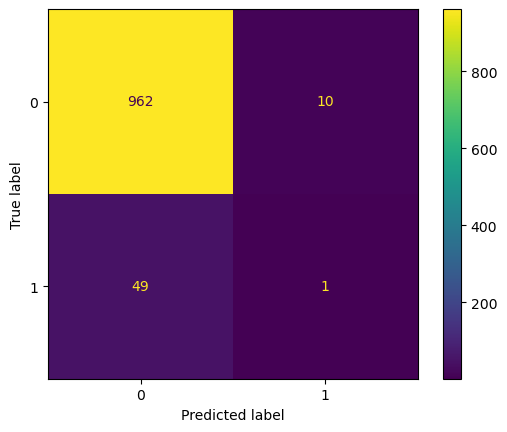

In [32]:
plot_confusion_matrix(RF, x_test, y_test)  
plt.show()

In [33]:
print(classification_report(y_test,RF.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.09      0.02      0.03        50

    accuracy                           0.94      1022
   macro avg       0.52      0.50      0.50      1022
weighted avg       0.91      0.94      0.92      1022

